In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


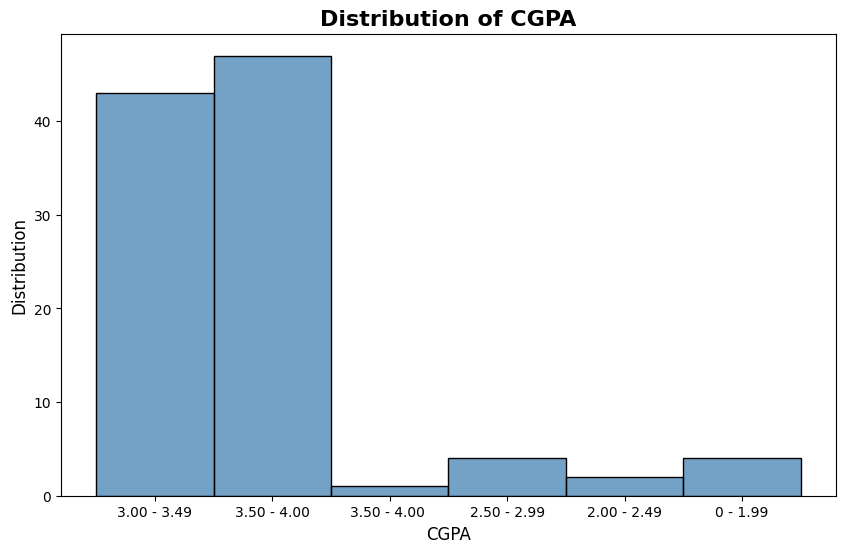

In [6]:
#exo1
plt.figure(figsize=(10,6))

sns.histplot(data=df, x='What is your CGPA?', bins=20, color='steelblue')

plt.title("Distribution of CGPA", fontsize=16, fontweight='bold')
plt.xlabel('CGPA', fontsize=12)
plt.ylabel('Distribution', fontsize=12)

plt.show()

/tmp/ipython-input-3974282193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=anxiety_by_gender.index, y=anxiety_by_gender.values, palette='viridis')


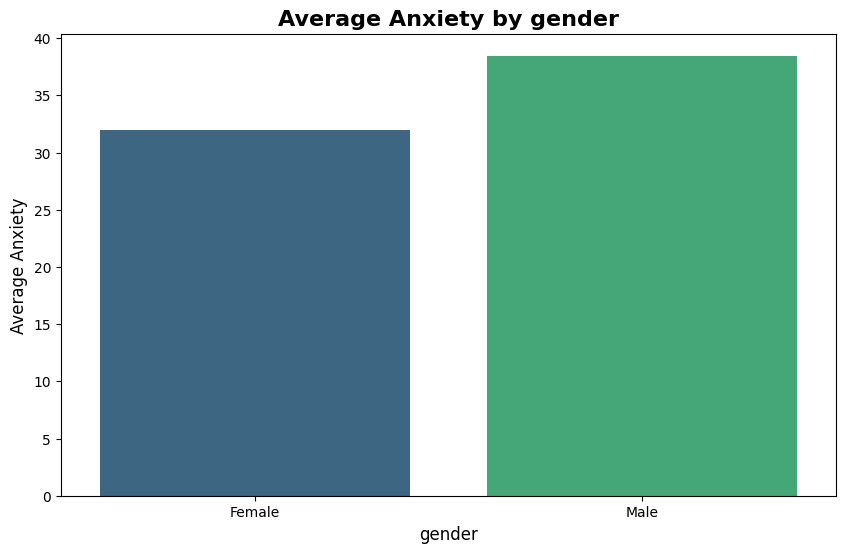

In [13]:
#exo2 Use a bar plot to compare the proportion of students experiencing anxiety across different genders.



anxiety_by_gender = df.groupby('Choose your gender')['Do you have Anxiety?'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
)
plt.figure(figsize=(10, 6))

sns.barplot( x=anxiety_by_gender.index, y=anxiety_by_gender.values, palette='viridis')

plt.title('Average Anxiety by gender', fontsize=16, fontweight='bold')
plt.xlabel('gender', fontsize=12)
plt.ylabel('Average Anxiety', fontsize=12)
plt.show()


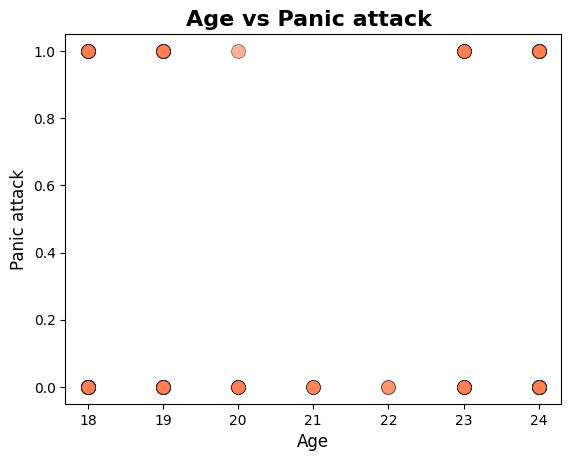

In [34]:
#exo3
df['Panic_numeric'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})
sns.scatterplot(
    x=df['Age'],
    y=df['Panic_numeric'],
    alpha=0.6,           # Transparence pour voir les points superposés
    s=100,               # Taille des points
    color='coral',       # Couleur personnalisée
    edgecolor='black',   # Contour des points
    linewidth=0.5
)
plt.title("Age vs Panic attack ", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Panic attack", fontsize=12)
plt.show()

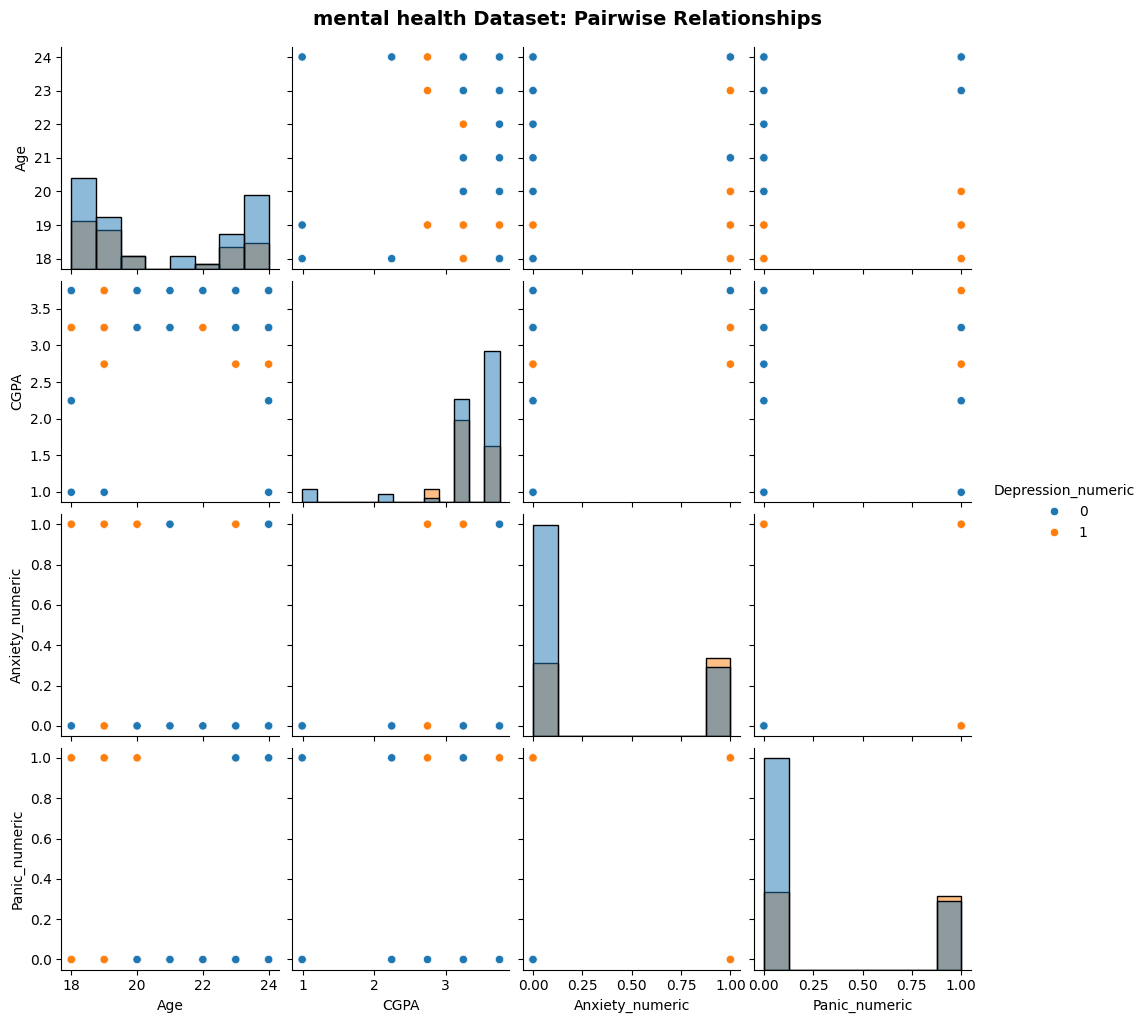

In [43]:
#exo4
df['Panic_numeric'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})
df['Anxiety_numeric'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
df['Depression_numeric'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})
def convert_cgpa(cgpa_str):
    if pd.isna(cgpa_str):
        return None
    if '-' in str(cgpa_str):
        # Extraire min et max de l'intervalle (ex: "3.00 - 3.49")
        parts = str(cgpa_str).split('-')
        min_val = float(parts[0].strip())
        max_val = float(parts[1].strip())
        return (min_val + max_val) / 2  # Moyenne de l'intervalle
    else:
        return float(cgpa_str)

df['CGPA'] = df['What is your CGPA?'].apply(convert_cgpa)
mental_health_subset = df[['Age', 'CGPA', 'Depression_numeric', 'Anxiety_numeric', 'Panic_numeric']].dropna()

sns.pairplot(mental_health_subset, hue='Depression_numeric', diag_kind='hist', height=2.5)

plt.suptitle('mental health Dataset: Pairwise Relationships', y=1.02, fontsize=14, fontweight='bold')
plt.show()

Correlation Matrix (raw numbers):
                     Age  CGPA  Depression_numeric  Anxiety_numeric  \
Age                 1.00  0.01               -0.07            -0.09   
CGPA                0.01  1.00                0.04             0.17   
Depression_numeric -0.07  0.04                1.00             0.27   
Anxiety_numeric    -0.09  0.17                0.27             1.00   
Panic_numeric       0.06  0.04                0.25             0.08   

                    Panic_numeric  
Age                          0.06  
CGPA                         0.04  
Depression_numeric           0.25  
Anxiety_numeric              0.08  
Panic_numeric                1.00  


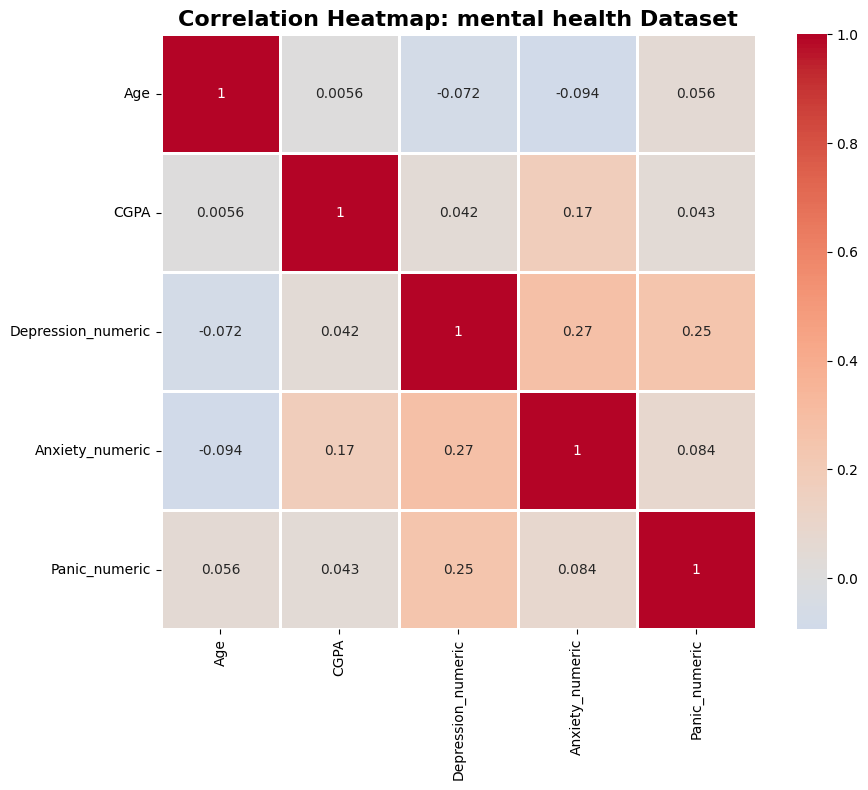

In [45]:
#exo5
df['Panic_numeric'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})
df['Anxiety_numeric'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
df['Depression_numeric'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})
def convert_cgpa(cgpa_str):
    if pd.isna(cgpa_str):
        return None
    if '-' in str(cgpa_str):
        # Extraire min et max de l'intervalle (ex: "3.00 - 3.49")
        parts = str(cgpa_str).split('-')
        min_val = float(parts[0].strip())
        max_val = float(parts[1].strip())
        return (min_val + max_val) / 2  # Moyenne de l'intervalle
    else:
        return float(cgpa_str)

df['CGPA'] = df['What is your CGPA?'].apply(convert_cgpa)
mental_health_col= ['Age', 'CGPA', 'Depression_numeric', 'Anxiety_numeric', 'Panic_numeric']

corr_matrix = df[mental_health_col].corr()

print("Correlation Matrix (raw numbers):")
print(corr_matrix.round(2))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
             annot=True, # Show numbers
             cmap='coolwarm', # Red-white-blue color scheme
             center=0, # White at 0
             square=True, # Squaare cells
             linewidths=1 # Cell borders
            )

plt.title("Correlation Heatmap: mental health Dataset", fontsize=16, fontweight='bold')
plt.tight_layout()


plt.show()

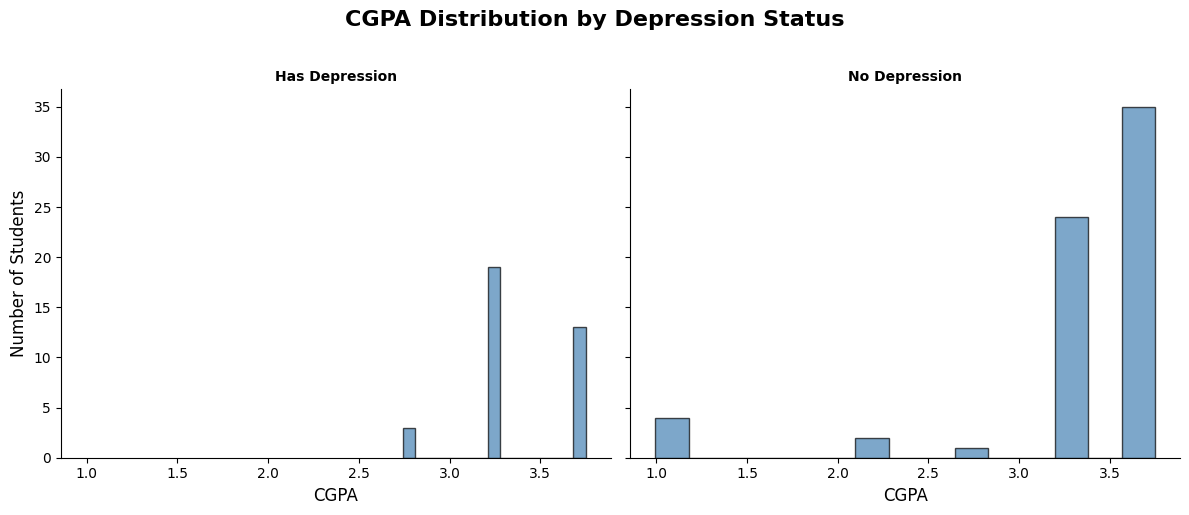

In [47]:
#exo6
#exo6
# S'assurer que les conversions sont faites
df['Depression_numeric'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})

def convert_cgpa(cgpa_str):
    if pd.isna(cgpa_str):
        return None
    if '-' in str(cgpa_str):
        parts = str(cgpa_str).split('-')
        min_val = float(parts[0].strip())
        max_val = float(parts[1].strip())
        return (min_val + max_val) / 2
    else:
        return float(cgpa_str)

df['CGPA'] = df['What is your CGPA?'].apply(convert_cgpa)

df['Depression_Status'] = df['Depression_numeric'].map({0: 'No Depression', 1: 'Has Depression'})

df_clean = df[['CGPA', 'Depression_Status']].dropna()

g = sns.FacetGrid(
    df_clean,
    col='Depression_Status',     # Une colonne par statut de dépression
    height=5,                     # Hauteur de chaque graphique
    aspect=1.2,                   # Ratio largeur/hauteur
    col_wrap=2                    # Max 2 colonnes
)

# Mapper un histogramme sur chaque facet
g.map(
    plt.hist,
    'CGPA',
    bins=15,                      # Nombre de barres
    color='steelblue',            # Couleur des barres
    edgecolor='black',            # Contour des barres
    alpha=0.7                     # Transparence
)

# Ajouter des titres et labels
g.set_axis_labels('CGPA', 'Number of Students', fontsize=12)
g.set_titles(col_template='{col_name}', fontweight='bold', fontsize=14)
g.fig.suptitle('CGPA Distribution by Depression Status',
               fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()